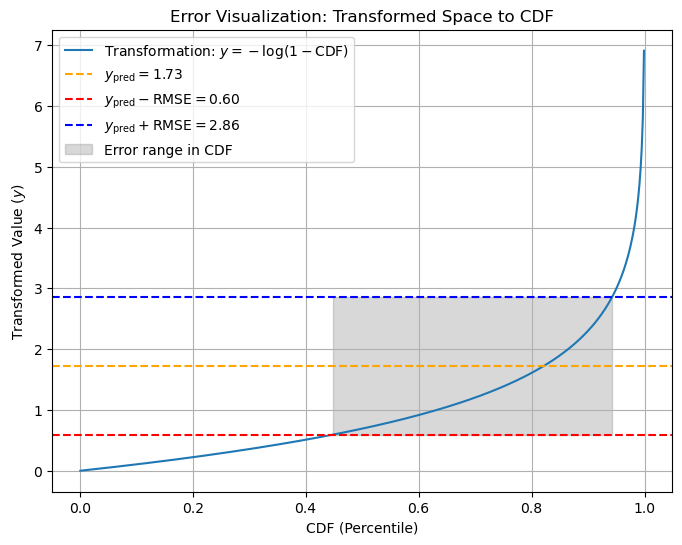

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the transformation and its inverse
def transform_cdf(cdf):
    return -np.log(1 - cdf)

def inverse_transform_y(y):
    return 1 - np.exp(-y)

# RMSE and representative value
rmse = 1.1345
y_pred = 1.73

# Range for CDF and transformed values
cdf_range = np.linspace(0.001, 0.999, 500)  # Avoid 0 and 1 due to log(0)
y_values = transform_cdf(cdf_range)

# RMSE bounds in the transformed space
y_lower = y_pred - rmse
y_upper = y_pred + rmse

# Corresponding CDF bounds
cdf_lower = inverse_transform_y(y_lower)
cdf_upper = inverse_transform_y(y_upper)

# Plot the transformation curve
plt.figure(figsize=(8, 6))
plt.plot(cdf_range, y_values, label="Transformation: $y = -\\log(1 - \mathrm{CDF})$")
plt.axhline(y_pred, color="orange", linestyle="--", label=f"$y_\\mathrm{{pred}} = {y_pred}$")
plt.axhline(y_lower, color="red", linestyle="--", label=f"$y_\\mathrm{{pred}} - \\mathrm{{RMSE}} = {y_lower:.2f}$")
plt.axhline(y_upper, color="blue", linestyle="--", label=f"$y_\\mathrm{{pred}} + \\mathrm{{RMSE}} = {y_upper:.2f}$")

# Highlight the error range on the CDF axis
plt.fill_betweenx([y_lower, y_upper], inverse_transform_y(y_lower), inverse_transform_y(y_upper), 
                  color="gray", alpha=0.3, label="Error range in CDF")

# Labels and legend
plt.xlabel("CDF (Percentile)")
plt.ylabel("Transformed Value ($y$)")
plt.title("Error Visualization: Transformed Space to CDF")
plt.legend()
plt.grid()
plt.show()